In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [7]:
News_ds = pd.read_csv("C:/Users/User/Downloads/module_pandas_B2-main (2)/module_pandas_B2-main/weather/weather.csv")

In [10]:
News_ds.head()

,Unnamed: 0,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [12]:
News_ds.shape

(25000, 25)

In [22]:
News_ds.isnull()

,Unnamed: 0,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,False,False,False,False,False,False,True,True,False,False,...,False,False,False,False,True,False,False,False,False,False
1,False,False,False,False,False,False,True,True,False,False,...,False,False,False,True,True,False,False,False,False,False
2,False,False,False,False,False,False,True,True,False,False,...,False,False,False,True,False,False,False,False,False,False
3,False,False,False,False,False,False,True,True,False,False,...,False,False,False,True,True,False,False,False,False,False
4,False,False,False,False,False,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,False,False,False,False,False,False,True,True,False,False,...,False,True,True,True,True,False,False,False,False,False
24996,False,False,False,False,False,False,True,True,False,False,...,False,True,True,True,True,False,False,False,False,False
24997,False,False,False,False,False,False,True,True,False,False,...,False,True,True,True,True,False,False,False,False,False
24998,False,False,False,False,False,False,True,True,False,False,...,False,True,True,True,True,False,False,False,False,False


In [29]:
cols_to_drop = ['Evaporation', 'Sunshine']
News_dropped_cols = News_ds.drop(columns=cols_to_drop)
News_dropped_cols.head()

,Unnamed: 0,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,0,2008-12-01,Albury,13.4,22.9,0.6,W,44.0,W,WNW,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,1,2008-12-02,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2,2008-12-03,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,3,2008-12-04,Albury,9.2,28.0,0.0,NE,24.0,SE,E,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,4,2008-12-05,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


array([[<Axes: title={'center': 'Unnamed: 0'}>,
        <Axes: title={'center': 'MinTemp'}>,
        <Axes: title={'center': 'MaxTemp'}>,
        <Axes: title={'center': 'Rainfall'}>],
       [<Axes: title={'center': 'WindGustSpeed'}>,
        <Axes: title={'center': 'WindSpeed9am'}>,
        <Axes: title={'center': 'WindSpeed3pm'}>,
        <Axes: title={'center': 'Humidity9am'}>],
       [<Axes: title={'center': 'Humidity3pm'}>,
        <Axes: title={'center': 'Pressure9am'}>,
        <Axes: title={'center': 'Pressure3pm'}>,
        <Axes: title={'center': 'Cloud9am'}>],
       [<Axes: title={'center': 'Cloud3pm'}>,
        <Axes: title={'center': 'Temp9am'}>,
        <Axes: title={'center': 'Temp3pm'}>,
        <Axes: title={'center': 'RISK_MM'}>]], dtype=object)

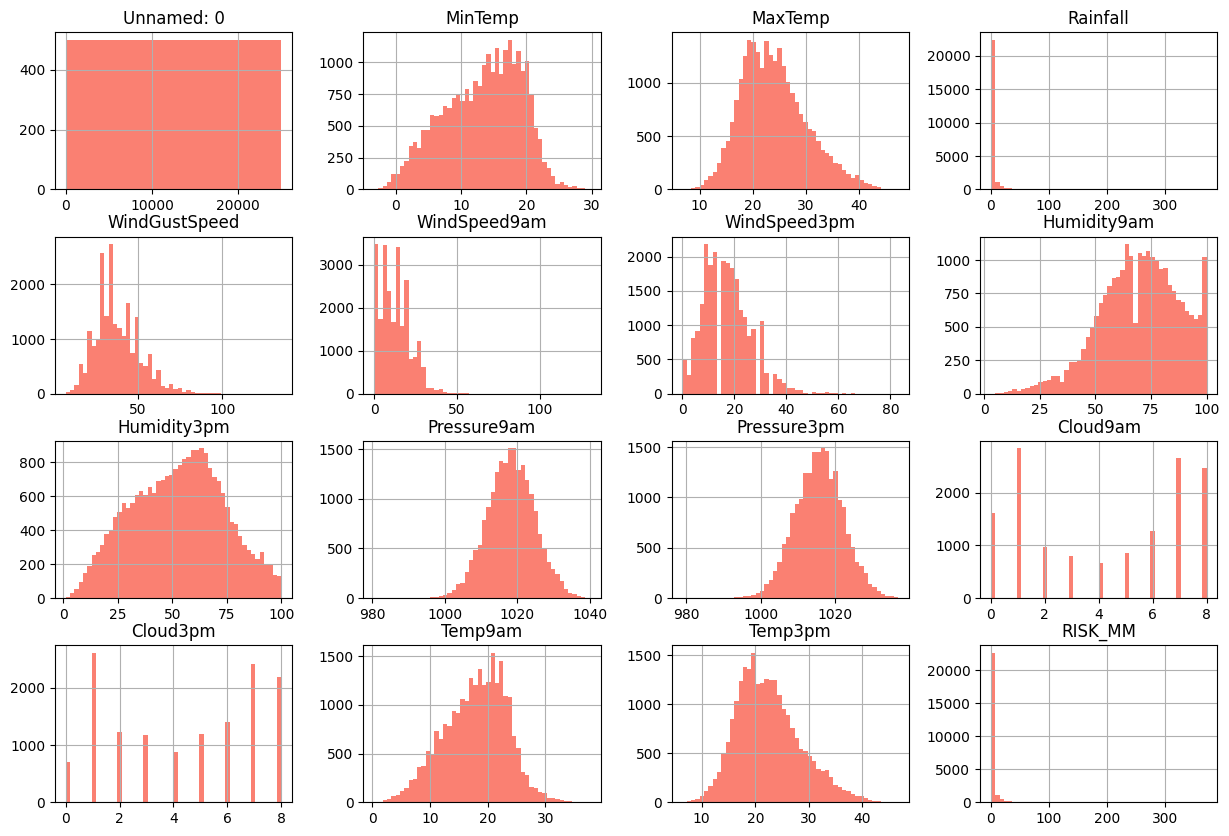

In [84]:
News_dropped_cols.hist(bins=50, figsize=(15, 10), color = 'salmon')

In [30]:
News_dropped_cols['Location'].unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith'], dtype=object)

In [31]:
News_dropped_cols['Location'].nunique()

9

In [32]:
News_dropped_cols.groupby(by='Location')['Location'].count()

Location
Albury           3011
BadgerysCreek    2928
Cobar            2988
CoffsHarbour     2953
Moree            2854
Newcastle        2955
NorahHead        2929
NorfolkIsland    2964
Penrith          1418
Name: Location, dtype: int64

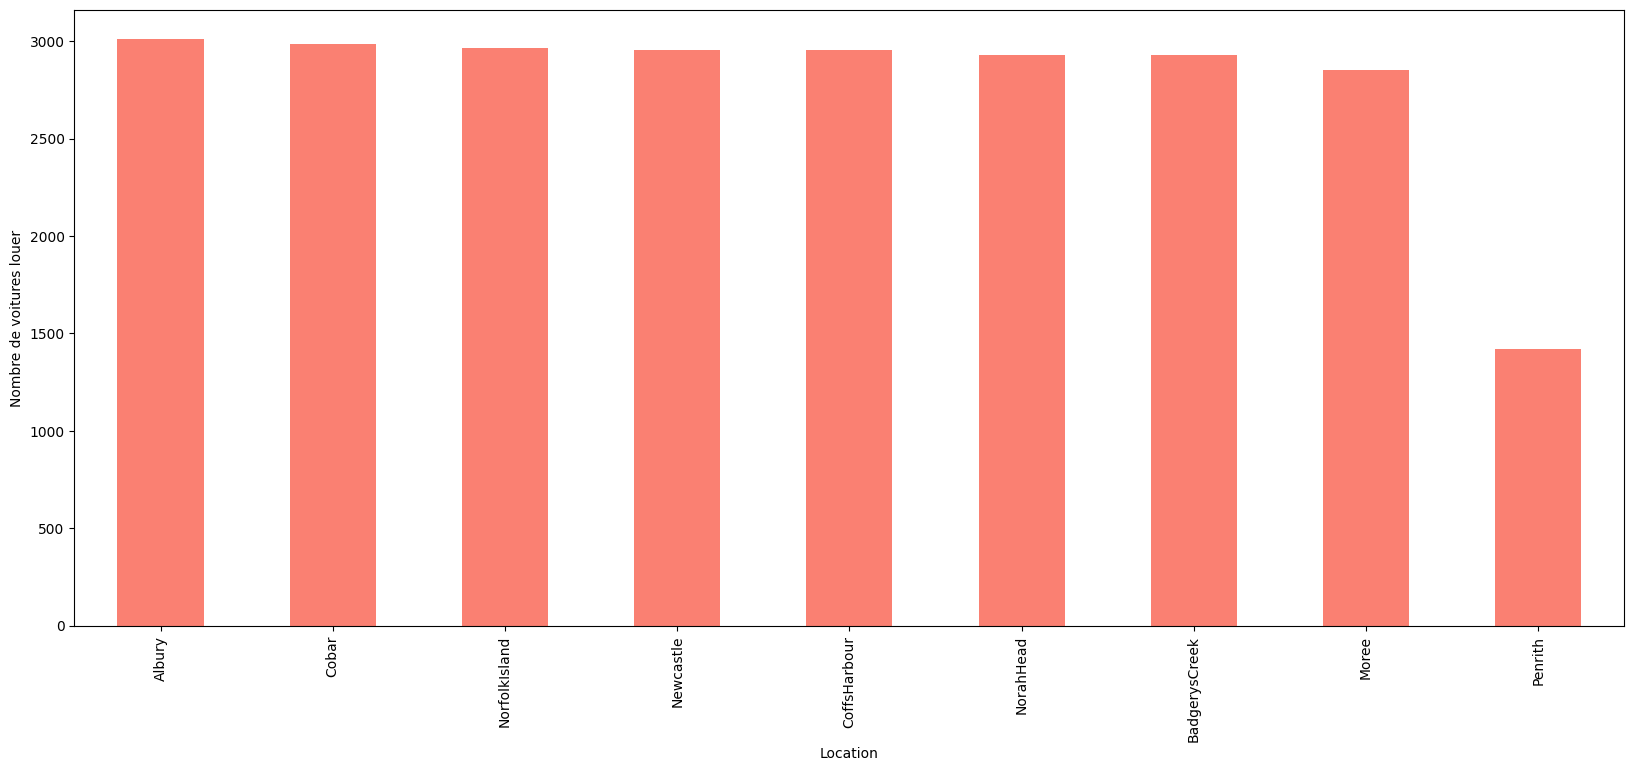

In [81]:
plt.figure(figsize=(20,8))
News_dropped_cols.groupby(by='Location')['Location'].count().sort_values(ascending=False).plot(kind='bar', color= 'salmon')
plt.xticks(rotation=90)
plt.xlabel('Location')
plt.ylabel('Nombre de voitures louer')
plt.show()

<Axes: >

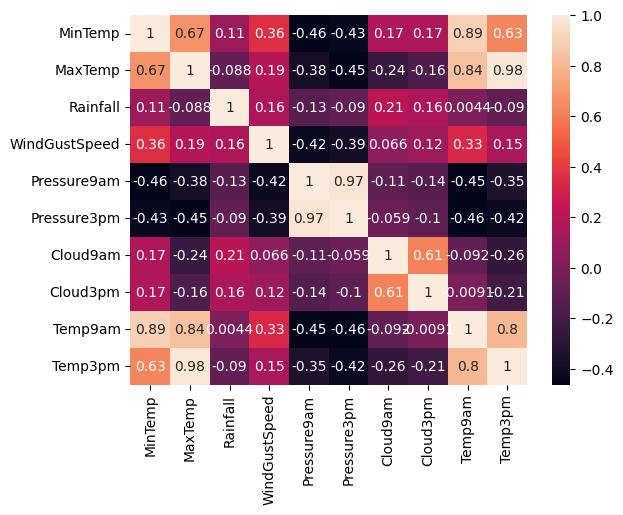

In [42]:
quant_columns = ['MinTemp',	'MaxTemp',	'Rainfall',	'WindGustSpeed', 'Pressure9am',	'Pressure3pm',	'Cloud9am',	'Cloud3pm',	'Temp9am',	'Temp3pm']
matrice_de_correlation = News_dropped_cols[quant_columns].corr() 
matrice_de_correlation = News_dropped_cols[quant_columns].corr(method='pearson')
sns.heatmap(News_dropped_cols[quant_columns].corr(), annot=True)

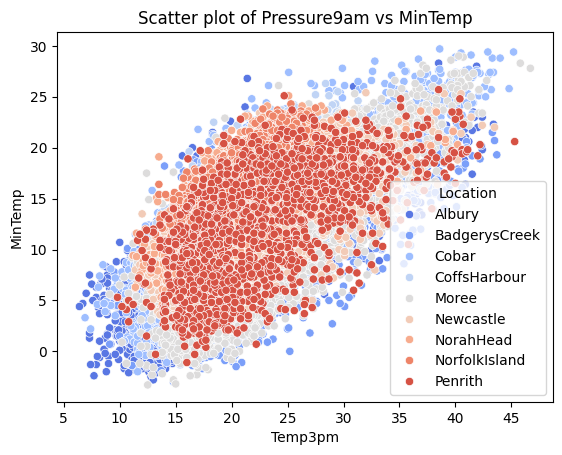

In [83]:
sns.scatterplot(x='Temp3pm', y='MinTemp', data=News_dropped_cols, hue='Location', palette='coolwarm')
plt.title('Scatter plot of Pressure9am vs MinTemp')
plt.xlabel('Temp3pm')
plt.ylabel('MinTemp')
plt.show()

In [64]:
NN= News_dropped_cols.dropna()

In [65]:
model = LinearRegression()
X = NN[['Temp3pm']]
y = NN['MinTemp']
model.fit(X, y)


LinearRegression()

In [66]:
slope, intercept = model.coef_[0], model.intercept_
print(f"Modèle de régression : y = {slope:.2f} * x + {intercept:.2f}")

Modèle de régression : y = 0.62 * x + 0.25


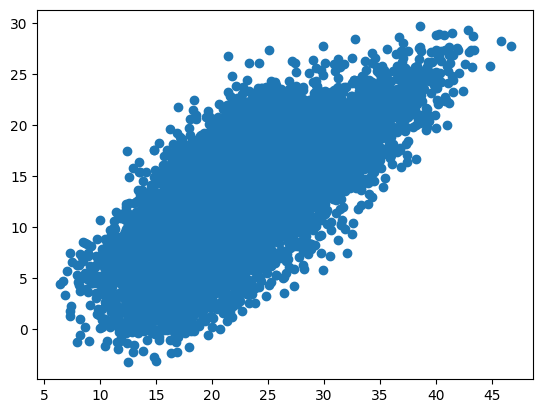

In [67]:
plt.scatter(X, y)

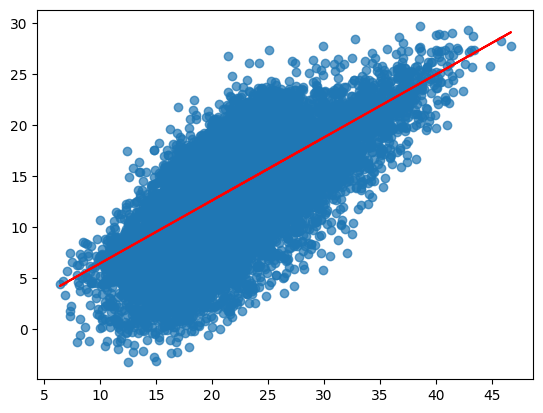

In [68]:
y_pred = model.predict(X)
plt.scatter(X, y, alpha=0.7)
plt.plot(X, y_pred, color='red')